In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

db = mysql.connector.connect(
    host='localhost',
    user='root',
    password='Devendra@2901',
    database='ecommerce'
)
cur = db.cursor()



# List all unique cities where customers are located

In [9]:
query = """ select distinct(customer_city) from customers """

cur.execute(query)

data = cur.fetchall()
df1 = pd.DataFrame(data)

df1.head(10)


,0
0,franca
1,sao bernardo do campo
2,sao paulo
3,mogi das cruzes
4,campinas
5,jaragua do sul
6,timoteo
7,curitiba
8,belo horizonte
9,montes claros


#  Count the number of orders placed in 2017.

In [11]:
query = """ SELECT COUNT(order_id)
FROM orders
WHERE EXTRACT(YEAR FROM order_purchase_timestamp) = 2017; """

cur.execute(query)

df2 = cur.fetchall()

print('Total number of orders is :', df2[0][0])

Total number of orders is : 45101


# Find the total sales per category

In [22]:
query = """ select upper(products.product_category) category, 
round(sum(payments.payment_value),2) sales
from products 
join order_item
on products.product_id = order_item.product_id
join payments
on payments.order_id = order_item.order_id
group by category"""


cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data, columns=['Category', 'Sales'])
df

,Category,Sales
0,PERFUMERY,506738.66
1,FURNITURE DECORATION,1430176.39
2,TELEPHONY,486882.05
3,BED TABLE BATH,1712553.67
4,AUTOMOTIVE,852294.33
...,...,...
69,CDS MUSIC DVDS,1199.43
70,LA CUISINE,2913.53
71,FASHION CHILDREN'S CLOTHING,785.67
72,PC GAMER,2174.43


# Count the number of customers from each state

<function matplotlib.pyplot.show(close=None, block=None)>

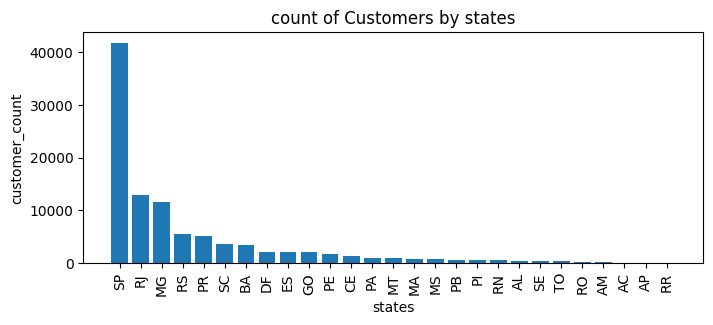

In [45]:
query = """ select customer_state, count(customer_id)
from customers 
group by customer_state
"""


cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data , columns =['state','customer_count'])
df = df.sort_values(by = "customer_count", ascending = False)

plt.figure(figsize = (8,3))
plt.bar(df['state'],df['customer_count'])
plt.xticks(rotation = 90)
plt.xlabel("states")
plt.ylabel("customer_count")
plt.title("count of Customers by states")
plt.show

#  Calculate the number of orders per month in 2018

<function matplotlib.pyplot.show(close=None, block=None)>

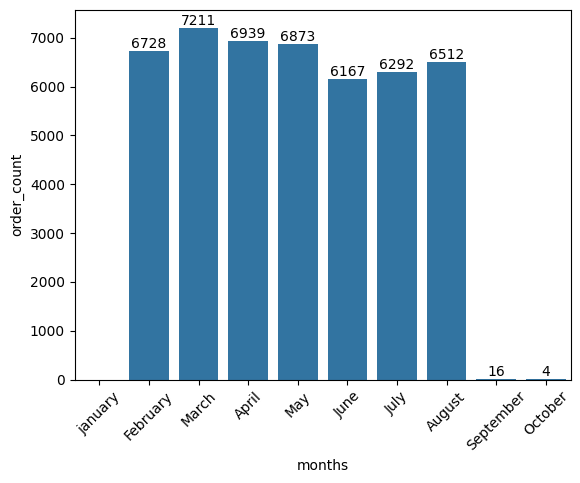

In [42]:
query = """ select monthname(order_purchase_timestamp) months, count(order_id) order_count
from orders where year(order_purchase_timestamp) = 2018
group by months"""


cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data, columns = ["months","order_count"])
o = ['january','February','March','April','May','June','July','August','September','October']
ax = sns.barplot(x = df['months'],y = df['order_count'], data = df, order = o)
plt.xticks(rotation = 45)
ax.bar_label(ax.containers[0])

plt.show
